# Frequency Modulated Continuous Radar (FMCW)
### Radar and Navigation - #1 Coding Task

---

*Developed by:*<br>
Naufal Mu'afi - 20/456724/TK/50548<br>
Department of Electrical and Information Engineering - UGM<br>
naufalmuafi@mail.ugm.ac.id<br>
<br>
*Reference:*<br>
P01_IsyaratKirim.m<br>
copyright to Mr. Iswandi

---

First, let's begin by importing the necessary modules for our program.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Secondly, let's move on to defining the constant and variable parameters for the Frequency Modulated Continuous Wave (FMCW) radar system.

In [2]:
# Constant
c = 3e8

# FMCW Signal Parameters
fc = 25e6    # Carrier Frequency (Hz)
bw = 1e5     # Bandwidth (Hz)
fr = 2       # Chirp Frequency (Hz)
tr = 1/fr    # Chirp period (Hz)

# Time Range
ns = 2**10                  # number of sample
tg = np.linspace(0, 1, ns)  # generation of time vector

In [3]:
"""

FMCW Signal Generation

"""

# initial condition
st = np.zeros(ns, dtype=complex)  # transmitted signal
ft = np.zeros(ns)                 # frequency of transmitted signal

for i in range(len(tg)):
    tg_i = tg[i]
    
    while tg_i > tr:
        tg_i -= tr
    
    tg_i -= tr/2
    st[i] = np.cos(2*np.pi*fc*tg_i + np.pi*bw*fr*(tg_i**2))
    ft[i] = fc + bw*fr*tg_i

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


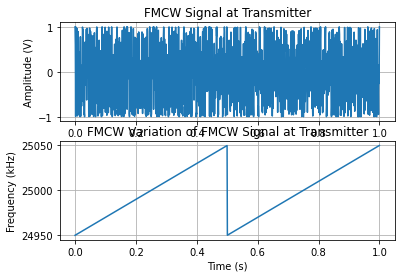

In [4]:
"""

FMCW Signal Plot

"""

# Graph 1
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Graph 2
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000)
plt.title('FMCW Variation of FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

Target = Ships

In [5]:
# Target Parameters
Rt = 95e3  # Target Distance (m)
Vt = 10    # Target radial velocity (m/s)

In [6]:
"""

Received Signal Generation

"""

# initial condition
srx = np.zeros(ns, dtype=complex)  # received signal
frx = np.zeros(ns)                 # frequency of received signal

for i in range(len(tg)):
    tg_i = tg[i]
    t_delay = 2*Rt/c
    t_delay += (2*tg_i*Vt/c)
    tg_i -= t_delay
    
    while tg_i > tr:
        tg_i -= tr
    
    tg_i -= tr/2
    srx[i] = np.cos(2 * np.pi * fc * tg_i + np.pi * bw * fr * (tg_i**2))
    frx[i] = fc + bw*fr*tg_i

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


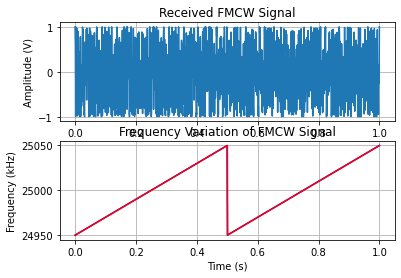

In [7]:
"""

Received FMCW Signal Plot

"""

# Graph 1
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('Received FMCW Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Graph 2
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000, 'b')
plt.plot(tg, frx/1000, 'r')
plt.title('Frequency Variation of FMCW Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

In [8]:
"""

add Gaussian Noise

"""

def noise(sig, req_snr):
    sig_energy = np.linalg.norm(sig) ** 2
    noise_energy = sig_energy / (10 ** (req_snr/10))
    noise_var = noise_energy / (len(sig) - 1)
    noise_std = np.sqrt(noise_var)
    noise = noise_std * np.random.randn(*sig.shape)
    noisy_sig = sig + noise
    
    return noisy_sig

srn = noise(srx, 10)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


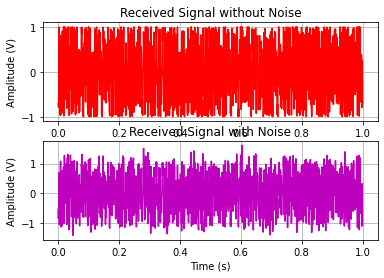

In [9]:
"""

Plot Signals with and without Noise

"""

# w/o Noise
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, srx, 'r')
plt.title('Received Signal without Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# w/ Noise
plt.subplot(2, 1, 2)
plt.plot(tg, srn, 'm')
plt.title('Received Signal with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


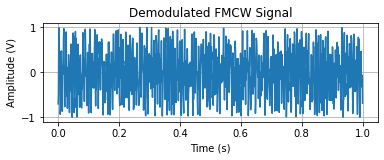

In [10]:
"""

Signal Processing

"""

# Demodulation
s_demod = srx * st

# Graph 1 with Demodulation
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tg, s_demod)
plt.title('Demodulated FMCW Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

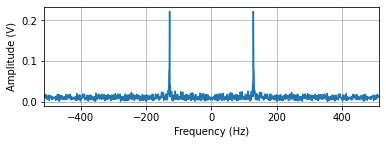

In [11]:
"""

Convert to Frequency Domain with FFT

"""

n_fft = 2**int(np.ceil(np.log2(len(s_demod))))
s_fft = np.fft.fftshift(np.fft.fft(s_demod, n_fft) / len(tg))
f_axis = np.fft.fftshift(np.fft.fftfreq(n_fft, d=1/ns))

plt.subplot(2, 1, 2)
plt.plot(f_axis, np.abs(s_fft))
plt.xlim([-ns/2, ns/2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

In [12]:
m = len(s_fft) // 2
peak, _ = find_peaks(np.abs(s_fft[m:]), height=0.2)
fd = f_axis[m + peak]
print(f"Peak Frequencies: {fd} Hz")

# Calculate Target Range
rest = c * fd * tr / (2*bw)
print(f"Estimated target range: {rest/1000} km")

Peak Frequencies: [128.] Hz
Estimated target range: [96.] km
